Step 1 :Data Collection

In [71]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Haris Ali\Restaurant_Reviews.tsv',delimiter='\t',encoding='utf-8')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Step 2 : Data Profiling

In [74]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
            Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


Step 3 : Data Quality

In [77]:
data_cleaned = data.drop_duplicates()
print(data_cleaned.isnull().sum())

Review    0
Liked     0
dtype: int64


Step 4 : Data Selection

In [80]:
X = data_cleaned['Review']
y = data_cleaned['Liked']

Step 5: Exploratory Data Analysis (EDA)

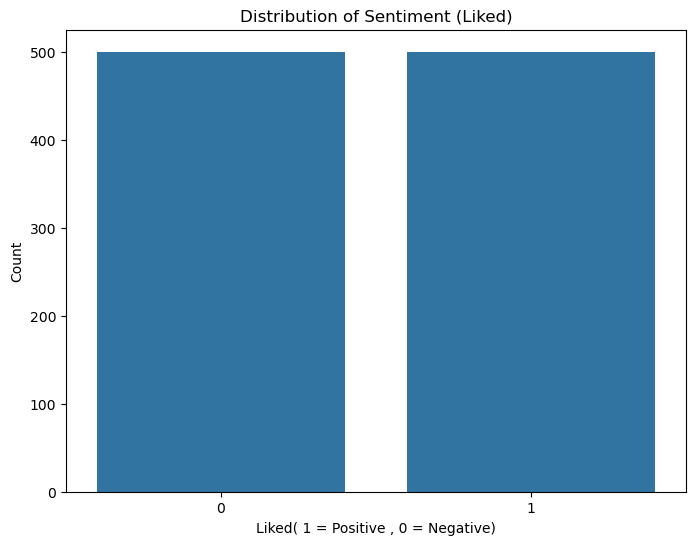

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (8,6))
sns.countplot(x = 'Liked' , data=data)
plt.title('Distribution of Sentiment (Liked)')
plt.xlabel('Liked( 1 = Positive , 0 = Negative)')
plt.ylabel('Count')
plt.show()

Step 6: Selection of Features

In [86]:
data = data [['Review','Liked']]
print('\n Selected Data ( Liked & Review ):')
print(data.head())


 Selected Data ( Liked & Review ):
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


Step 7: Selection of Model

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , accuracy_score

Step 8: Model Training

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF Vectorization to the review text
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Step 9: Model Tuning / Hyper-parameter Tuning


In [95]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5]}  # Smoothing parameter
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5]}, scoring='accuracy')

Step 10 : Cross_Validation

In [98]:
best_model = grid_search.best_estimator_

Step 11 : Predict on Test Class

In [101]:
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.765

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       106
           1       0.73      0.80      0.76        94

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

